In [1]:
install.packages("R.matlab")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
install.packages(c("Rmixmod", "NbClust", "mclust", "FactoMineR", "Rmixmod", "Rtsne", "lle", "cluster", "aricode", "caret"))

Warning message in install.packages(c("Rmixmod", "NbClust", "mclust", "FactoMineR", :
“installation of package ‘caret’ had non-zero exit status”
Warning message in install.packages(c("Rmixmod", "NbClust", "mclust", "FactoMineR", :
“installation of package ‘FactoMineR’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [241]:
install.packages("umap")

also installing the dependencies ‘RcppTOML’, ‘here’, ‘png’, ‘reticulate’, ‘RSpectra’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



# 1 Introduction au tables de donnees

Les différents ensembles de données couvrent différents aspects et problèmes de la vie réelle auxquels nous sommes confrontés avec les données :


* JAFFE s'attaque au problème lorsque nous avons un grand nombre de caractéristiques par rapport au nombre d'échantillons.
* Les autres jeux de données ont plus d'échantillons que de caractéristiques avec des ratios différents : MNIST (4.45x), MFEA (8.33x), USPS (38.32x), et OPTIDIGITS (87.81x).



In [272]:
library(R.matlab)
library(Rmixmod)
library(mclust)
library(NbClust)
library(FactoMineR)
library(lle)
library(cluster)
library(aricode)
library(Rtsne)
library(caret)
library(umap)

In [273]:
mfeat=readMat("data/MFEAT1.mat")
jaffe=readMat("data/jaffe.mat")
mnist=readMat("data/MNIST5.mat")
usps=readMat("data/USPS.mat")
optidigits=readMat("data/Optdigits.mat")

# JAFFE

## Visualisation des donnees

In [106]:
pca.jaffe=PCA((jaffe$X),ncp=2)

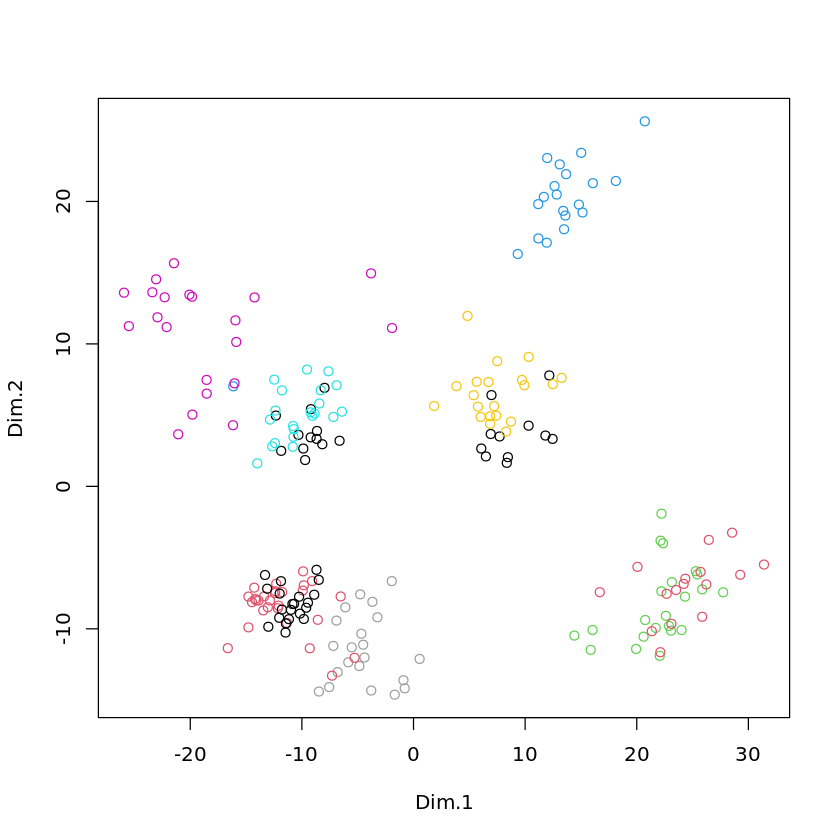

In [7]:
plot(pca.jaffe$ind$coord,col=jaffe$y)

In [8]:
tsne.jaffe=Rtsne(jaffe$X,dim=2 )

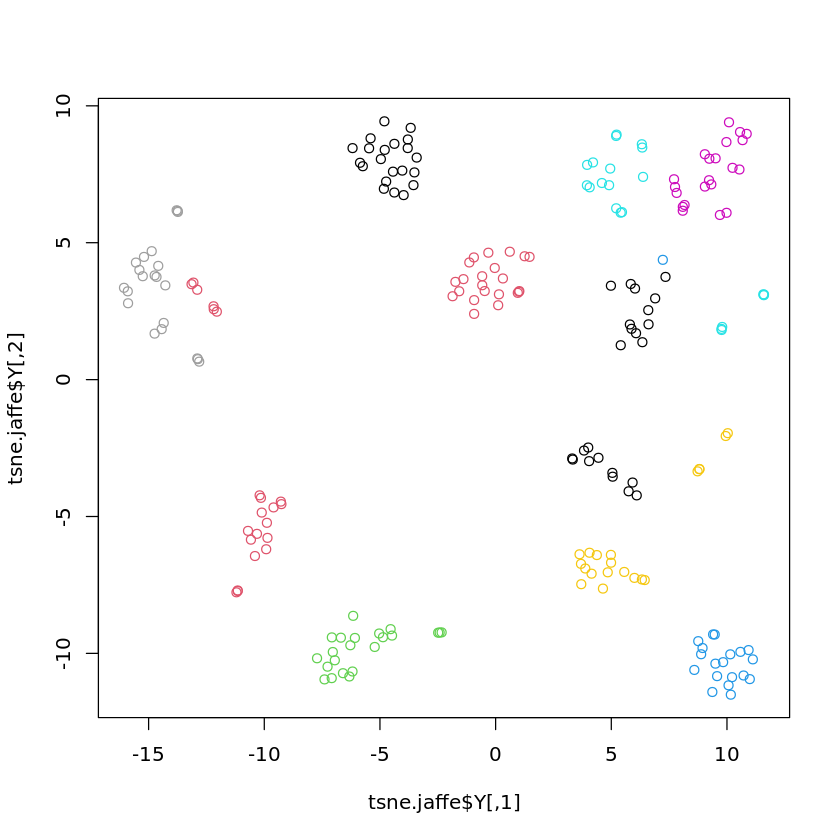

In [9]:
plot(tsne.jaffe$Y,col=jaffe$y)

## 3.Partitionnement

### Kmeans

In [117]:
km.jaffe=NbClust(jaffe$X, method = "kmeans", distance = "euclidean", index = "silhouette",max.nc = 10)

In [118]:
km.jaffe$Best.nc

Number_clusters     Value_Index 
         9.0000          0.2909

### Average

In [119]:
average.jaffe=NbClust(jaffe$X, method = "average", index = "silhouette")

In [120]:
average.jaffe$Best.nc

Number_clusters     Value_Index 
        15.0000          0.3353

### Ward

In [121]:
ward.jaffe=NbClust(jaffe$X, method = "ward.D", index = "silhouette")

In [122]:
ward.jaffe$Best.nc

Number_clusters     Value_Index 
         15.000           0.357

### Single

In [123]:
single.jaffe=NbClust(jaffe$X, method = "single", index = "silhouette")

In [124]:
single.jaffe$Best.nc

Number_clusters     Value_Index 
        15.0000          0.3032

### Complete

In [125]:
complete.jaffe=NbClust(jaffe$X, method = "complete", index = "silhouette")

In [126]:
complete.jaffe$Best.nc

Number_clusters     Value_Index 
         15.000           0.305

## 4.HCPC

In [109]:
hcpcward.jeffe=HCPC(pca.jaffe,method = "ward", nb.clust=-1)

In [110]:
hcpcward.jeffe$call$t$nb.clust

[1] 4

In [111]:
hcpccomp.jeffe=HCPC(pca.jaffe,method = "complete", nb.clust=-1)

In [112]:
hcpccomp.jeffe$call$t$nb.clust

[1] 4

In [113]:
hcpcsingle.jeffe=HCPC(pca.jaffe,method = "single", nb.clust=-1)

In [114]:
hcpcsingle.jeffe$call$t$nb.clust

[1] 3

In [115]:
hcpcav.jeffe=HCPC(pca.jaffe,method = "average", nb.clust=-1)

In [116]:
hcpcav.jeffe$call$t$nb.clust

[1] 3

## 6. Confusion

In [127]:
table(ward.jaffe$Best.partition, hcpcward.jeffe$data.clust$clust)

    
      1  2  3  4
  1  23  0  0  0
  2   0  0 11  0
  3   0 22  0  0
  4   0  0  0 14
  5   0  0  0  8
  6   0  0 19  0
  7  17  0  0  0
  8  14  0  1  0
  9   0  0  5  0
  10  0  0 15  0
  11  0 12  0  0
  12  0 15  0  0
  13  0 21  0  0
  14  0  0  0  3
  15  0  0  0 13

In [128]:
table(ward.jaffe$Best.partition, hcpcward.jeffe$data.clust$clust)

    
      1  2  3  4
  1  23  0  0  0
  2   0  0 11  0
  3   0 22  0  0
  4   0  0  0 14
  5   0  0  0  8
  6   0  0 19  0
  7  17  0  0  0
  8  14  0  1  0
  9   0  0  5  0
  10  0  0 15  0
  11  0 12  0  0
  12  0 15  0  0
  13  0 21  0  0
  14  0  0  0  3
  15  0  0  0 13

## 7.Melange

In [146]:
pca.jaffe = PCA(t(jaffe$X), graph = FALSE)

In [147]:
strategie=mixmodStrategy(algo="EM",initMethod="smallEM",nbTry=10,epsilonInInit=0.00001)

In [148]:
mmgRmix.jaffe=mixmodCluster(data=as.data.frame(pca.jaffe$var$coord),nbCluster=4)

In [149]:
mmgRmix.jaffe

****************************************
*** INPUT:
****************************************
* nbCluster =  4 
* criterion =  BIC 
****************************************
*** MIXMOD Models:
* list =  Gaussian_pk_Lk_C 
* This list includes only models with free proportions.
****************************************
* data (limited to a 10x10 matrix) =
    Dim.1  Dim.2    Dim.3    Dim.4    Dim.5  
V1  0.8668 0.2269   -0.2072  -0.1761  0.05215
V2  0.8338 -0.04985 -0.2444  -0.1159  0.1516 
V3  0.8595 0.1451   -0.1906  -0.1046  0.1631 
V4  0.8711 0.0614   -0.2141  -0.1877  0.1587 
V5  0.8761 0.03283  -0.2039  -0.147   0.1738 
V6  0.8476 -0.03722 -0.2242  -0.06942 0.1723 
V7  0.8621 0.2826   -0.1206  -0.1086  0.1628 
V8  0.8572 0.1351   -0.17    -0.1115  0.1947 
V9  0.8551 0.2045   -0.1578  -0.1622  0.1617 
V10 0.8035 0.4057   -0.07128 -0.1029  0.08095
* ... ...
****************************************
*** MIXMOD Strategy:
* algorithm            =  EM 
* number of tries      =  1 
* number o

In [150]:
length(mmgRmix.jaffe@bestResult@partition)

[1] 213

In [151]:
length(jaffe$y)

[1] 213

In [152]:
table(mmgRmix.jaffe@bestResult@partition,jaffe$y)

   
     1  2  3  4  5  6  7  8  9 10
  1 23  0 22 20  3  0 17  0  0  0
  2  0 22  0  0 17 21  1  0  0  0
  3  0  0  0  0  1  0  2  3 21  0
  4  0  0  0  0  0  0  0 18  0 22

In [154]:
mmgMclust.jaffe=Mclust(data= jaffe$X)

In [155]:
table( mmgMclust.jaffe$classification,jaffe$y)

   
     1  2  3  4  5  6  7  8  9 10
  1 23  0  0  1 21  1  0  0  0  0
  2  0 22  0  0  0  0  0  0  0  0
  3  0  0 22  0  0  0  0  0  0  0
  4  0  0  0 19  0  0  0  0  0  0
  5  0  0  0  0  0 20  0  0  0  0
  6  0  0  0  0  0  0 20  0  0  0
  7  0  0  0  0  0  0  0 21  0  6
  8  0  0  0  0  0  0  0  0 21  0
  9  0  0  0  0  0  0  0  0  0 16

In [156]:
mmgRmix.jaffe=mixmodCluster(data=as.data.frame(pca.jaffe$var$coord),nbCluster=10)

In [157]:
mmgRmix.jaffe

****************************************
*** INPUT:
****************************************
* nbCluster =  10 
* criterion =  BIC 
****************************************
*** MIXMOD Models:
* list =  Gaussian_pk_Lk_C 
* This list includes only models with free proportions.
****************************************
* data (limited to a 10x10 matrix) =
    Dim.1  Dim.2    Dim.3    Dim.4    Dim.5  
V1  0.8668 0.2269   -0.2072  -0.1761  0.05215
V2  0.8338 -0.04985 -0.2444  -0.1159  0.1516 
V3  0.8595 0.1451   -0.1906  -0.1046  0.1631 
V4  0.8711 0.0614   -0.2141  -0.1877  0.1587 
V5  0.8761 0.03283  -0.2039  -0.147   0.1738 
V6  0.8476 -0.03722 -0.2242  -0.06942 0.1723 
V7  0.8621 0.2826   -0.1206  -0.1086  0.1628 
V8  0.8572 0.1351   -0.17    -0.1115  0.1947 
V9  0.8551 0.2045   -0.1578  -0.1622  0.1617 
V10 0.8035 0.4057   -0.07128 -0.1029  0.08095
* ... ...
****************************************
*** MIXMOD Strategy:
* algorithm            =  EM 
* number of tries      =  1 
* number 

In [158]:
table(mmgRmix.jaffe@bestResult@partition,jaffe$y)

    
      1  2  3  4  5  6  7  8  9 10
  1   0  0 22  0  0  0  0  0  0  0
  2   0  0  0  0  1  0 16  0  0  0
  3   0 22  0  0  0  0  0  0  0  0
  4   0  0  0  0  0  0  0  0 21  0
  5   0  0  0 20  0  0  0  0  0  0
  6   0  0  0  0 20  7  0  0  0  0
  7   0  0  0  0  0 14  0  0  0  0
  8   0  0  0  0  0  0  0 21  0 22
  9  23  0  0  0  0  0  2  0  0  0
  10  0  0  0  0  0  0  2  0  0  0

Les 2 partitions sont tres bonnes

## 9. MclustDR
D'apres la doc MclustDR est une méthode de réduction de dimension pour visualiser la structure de regroupement ou de classification obtenue à partir d'un mélange fini de densités gaussiennes.


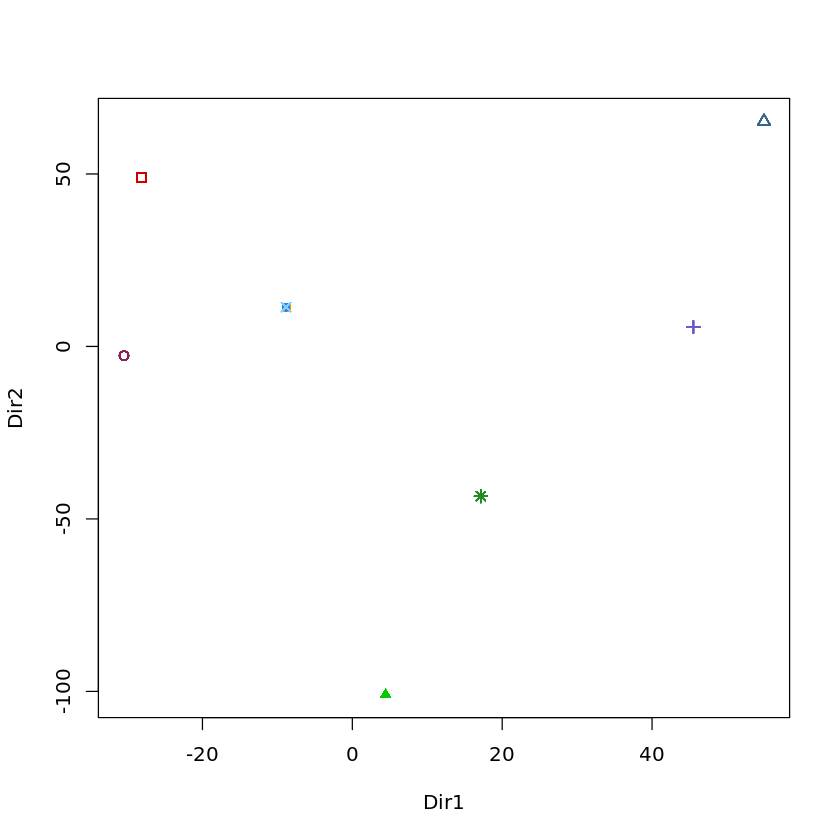

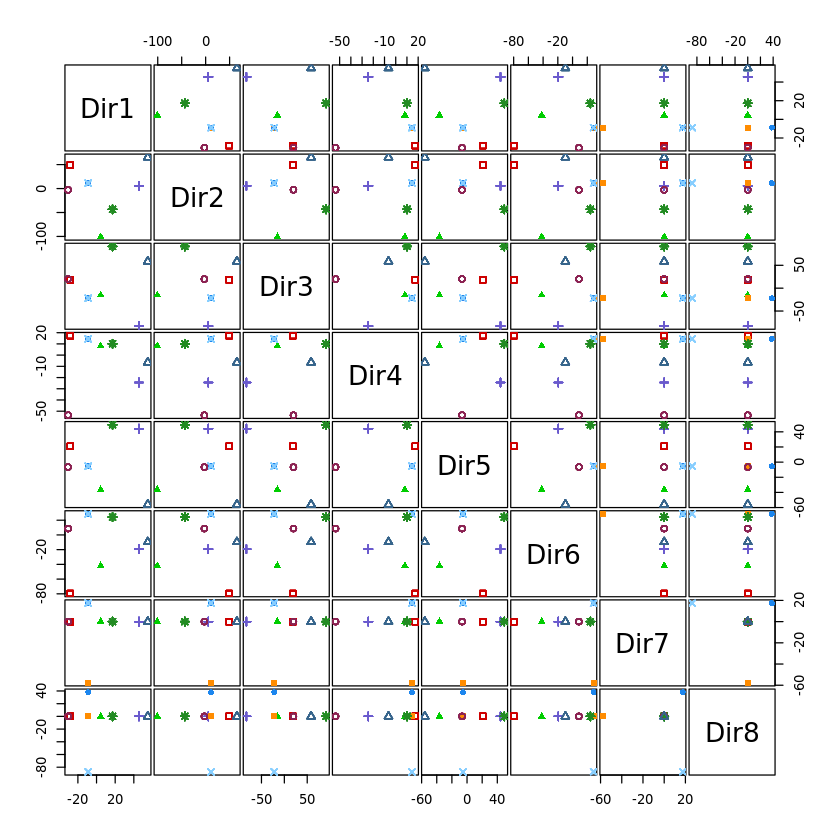

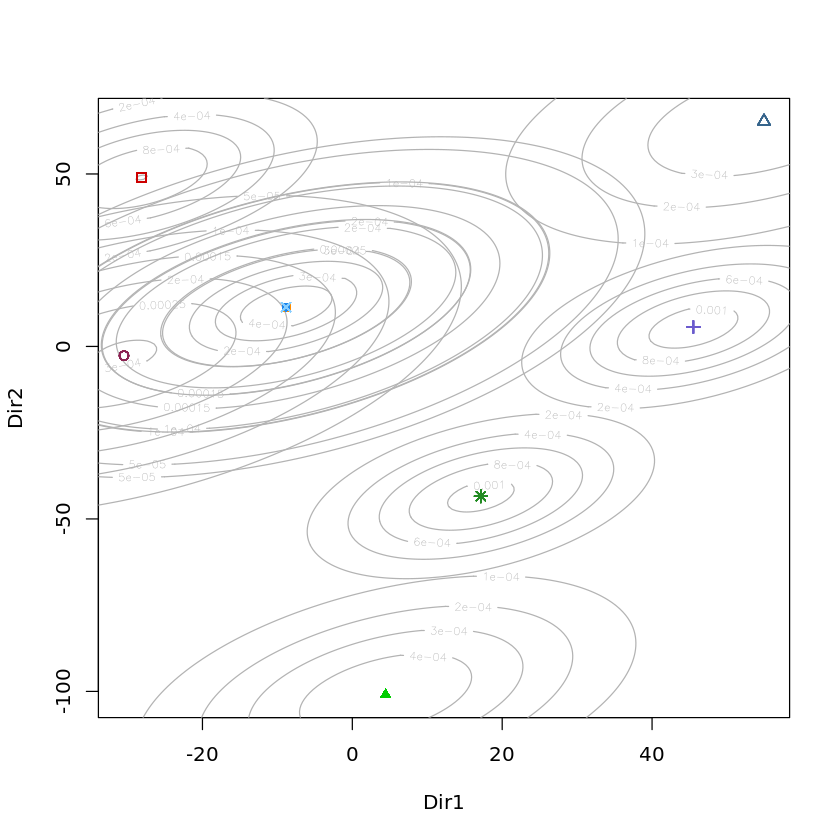

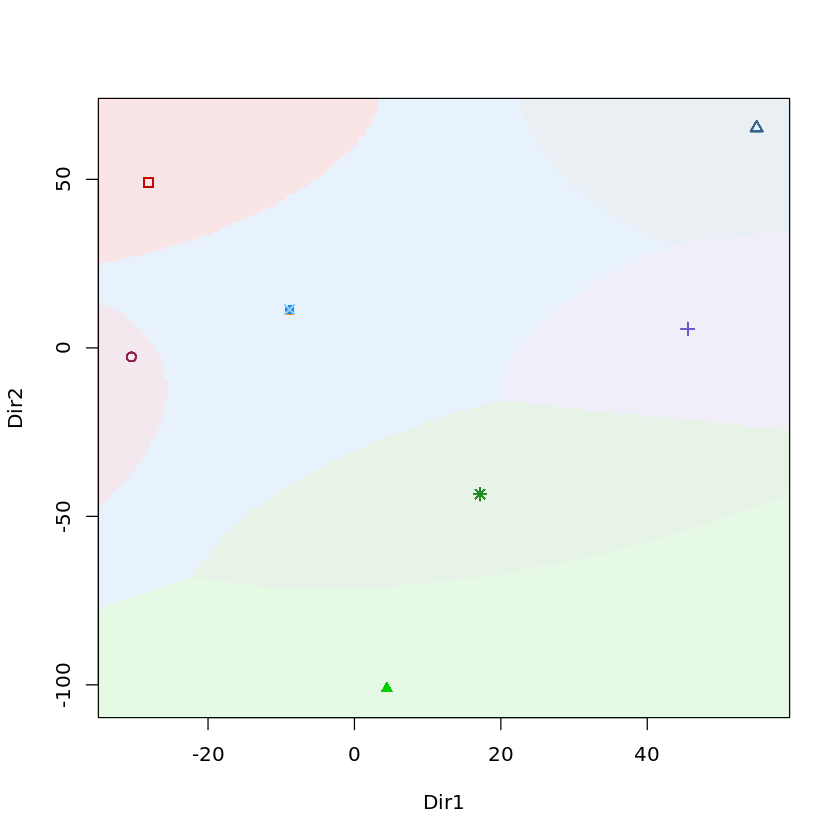

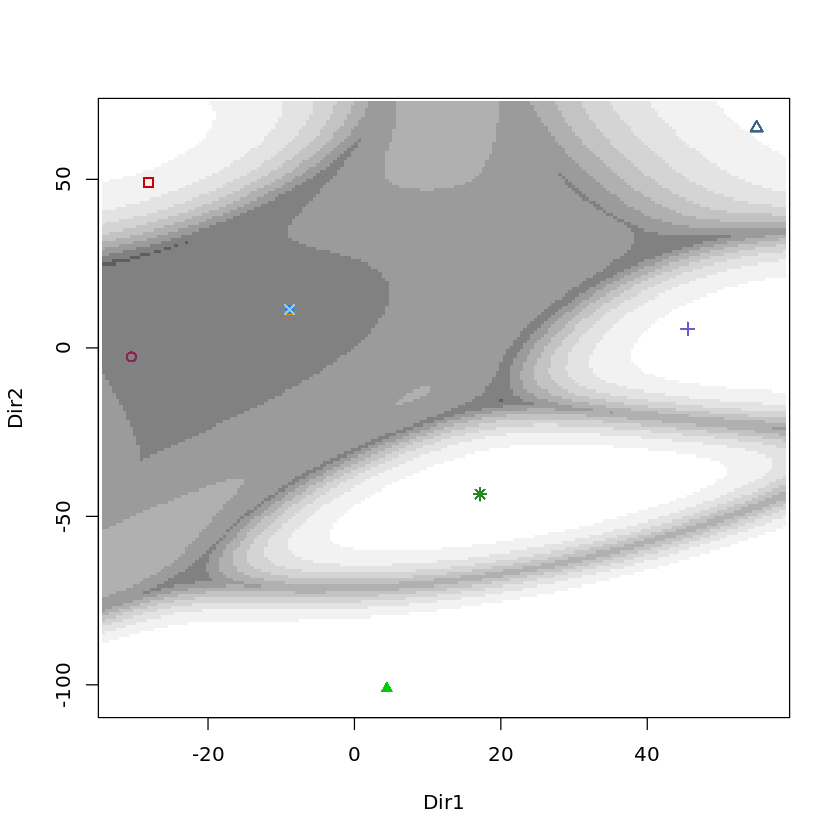

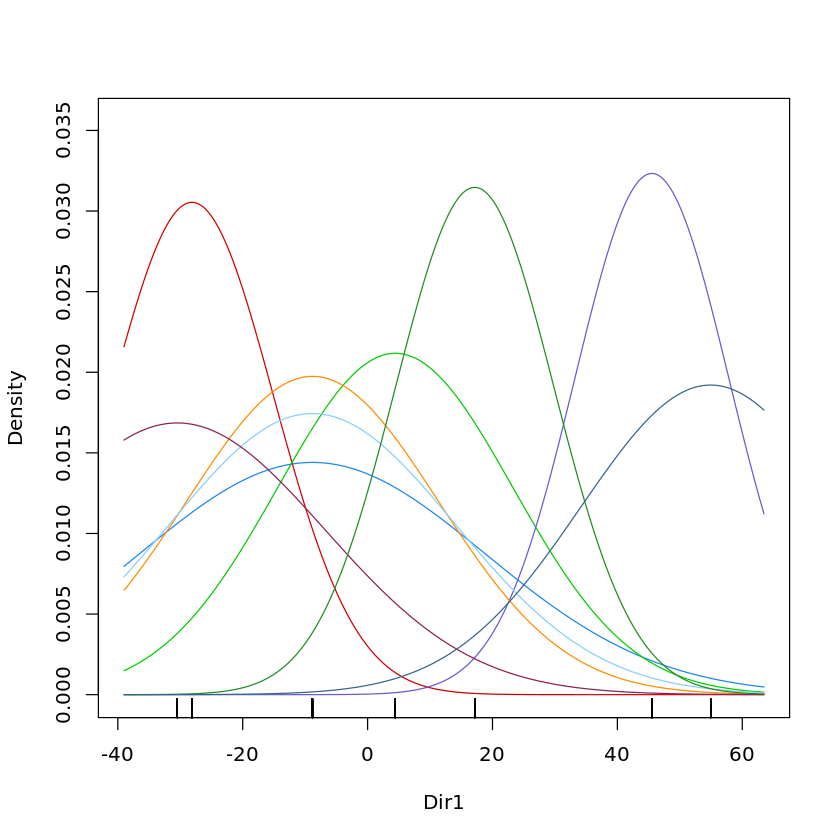

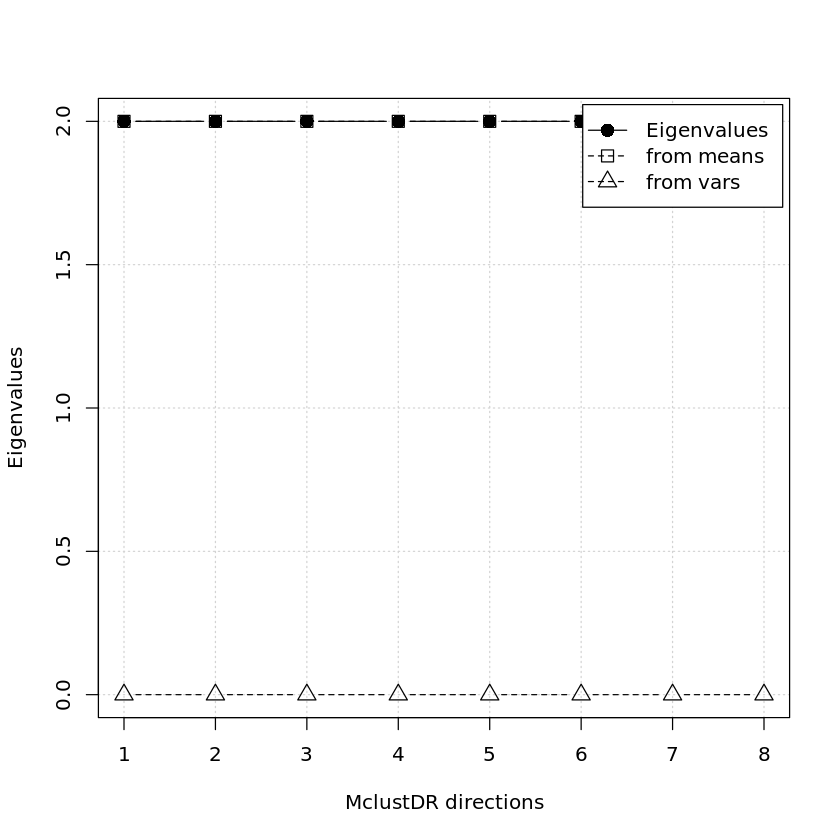

In [162]:
plot(MclustDR(mmgMclust.jaffe))

## 10. Etude comparative

### Kmeans

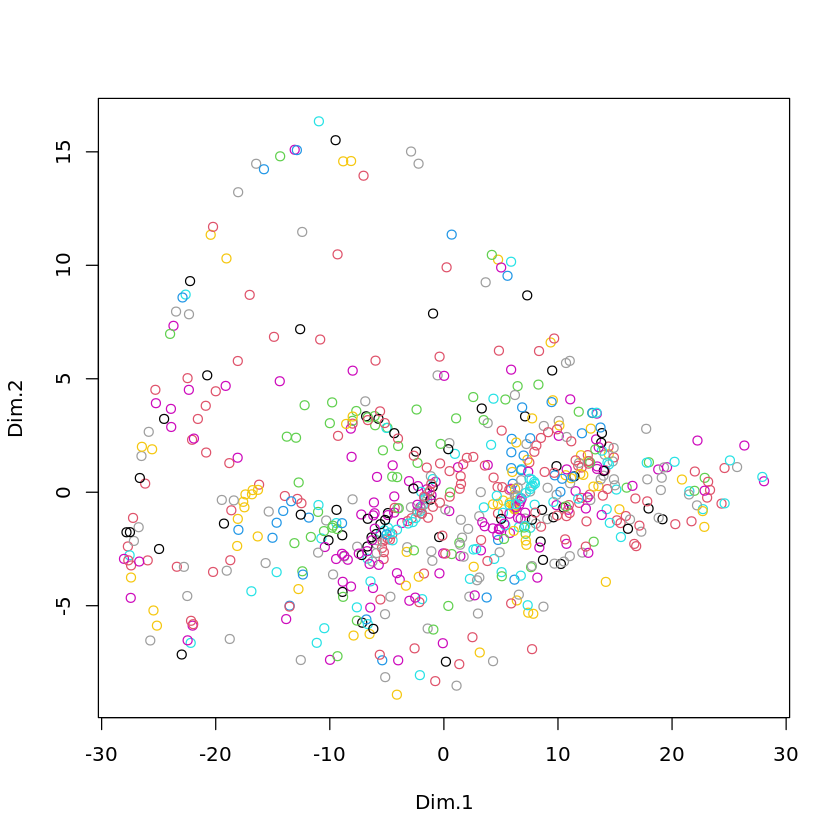

In [163]:
km.jaffe=NbClust(jaffe$X, method = "kmeans", distance = "euclidean", index = "silhouette",min.nc = 10,max.nc = 10)
plot(pca.jaffe$ind$coord,col=km.jaffe$Best.partition)

In [192]:
unique(as.vector(jaffe$y))

[1]  1  2  3  4  5  6  7  8  9 10

In [193]:
table(km.jaffe$Best.partition,as.vector(jaffe$y))

    
      1  2  3  4  5  6  7  8  9 10
  1   0  0  0  6  0  0  0  0  0  0
  2   0  0  0  0  0  0  0 15  0  0
  3   0  0  0  0  0 21  0  0  0  0
  4   0  0  0  0  0  0  0  6  0  6
  5   0 22  0  0  0  0  0  0  0  0
  6  12  0  0  1 21  0  0  0  0  0
  7   0  0  0  0  0  0  2  0 21  0
  8   0  0 22  0  0  0  0  0  0 16
  9   0  0  0 13  0  0  0  0  0  0
  10 11  0  0  0  0  0 18  0  0  0

In [200]:
(11+7+2+6)/223

[1] 0.1165919

In [181]:
NMI(km.jaffe$Best.partition,as.vector(jaffe$y))

[1] 0.8238341

In [198]:
ARI(km.jaffe$Best.partition,as.vector(jaffe$y))

[1] 0.6820343

In [ ]:
v

### Average

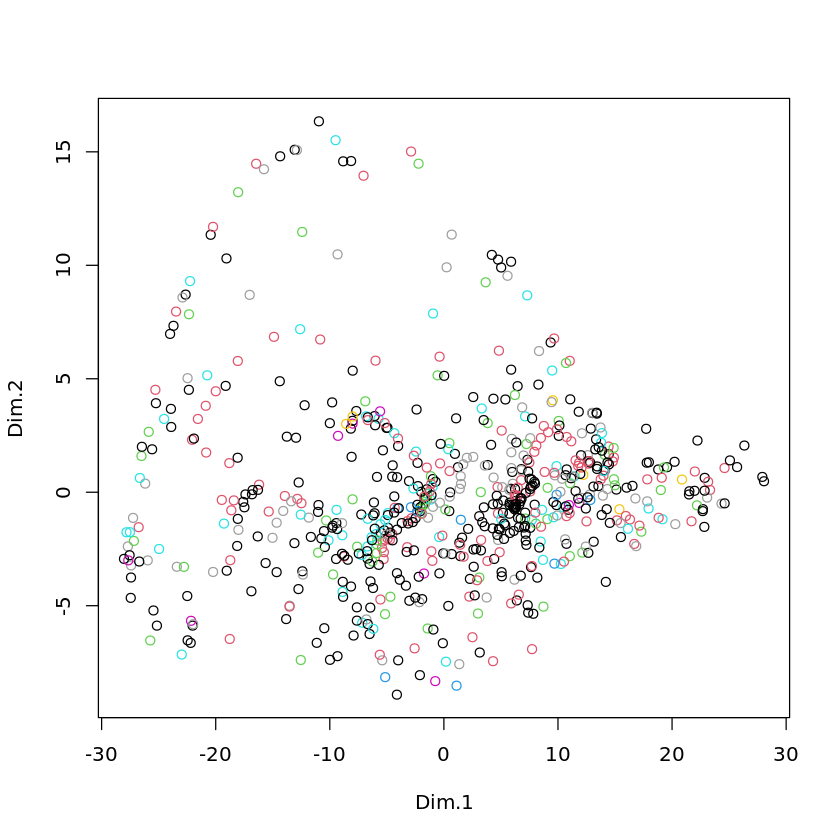

In [201]:
average.jaffe=NbClust(jaffe$X, method = "average", distance = "euclidean", index = "silhouette",min.nc = 10,max.nc = 10)
plot(pca.jaffe$ind$coord,col=average.jaffe$Best.partition)

In [202]:
table(average.jaffe$Best.partition,as.vector(jaffe$y))

    
      1  2  3  4  5  6  7  8  9 10
  1  12 22  0  1 21 21  0  0 21  0
  2  11  0  0  0  0  0 15  0  0  0
  3   0  0 19  0  0  0  0  0  0  0
  4   0  0  3  0  0  0  0  0  0  0
  5   0  0  0 19  0  0  0  0  0  0
  6   0  0  0  0  0  0  3  0  0  0
  7   0  0  0  0  0  0  2  0  0  0
  8   0  0  0  0  0  0  0 21  0  6
  9   0  0  0  0  0  0  0  0  0  3
  10  0  0  0  0  0  0  0  0  0 13

In [203]:
(11+3+1+5+9)/223

[1] 0.1300448

In [204]:
NMI(average.jaffe$Best.partition,as.vector(jaffe$y))

[1] 0.608953

In [205]:
ARI(average.jaffe$Best.partition,as.vector(jaffe$y))

[1] 0.3419646

### Ward

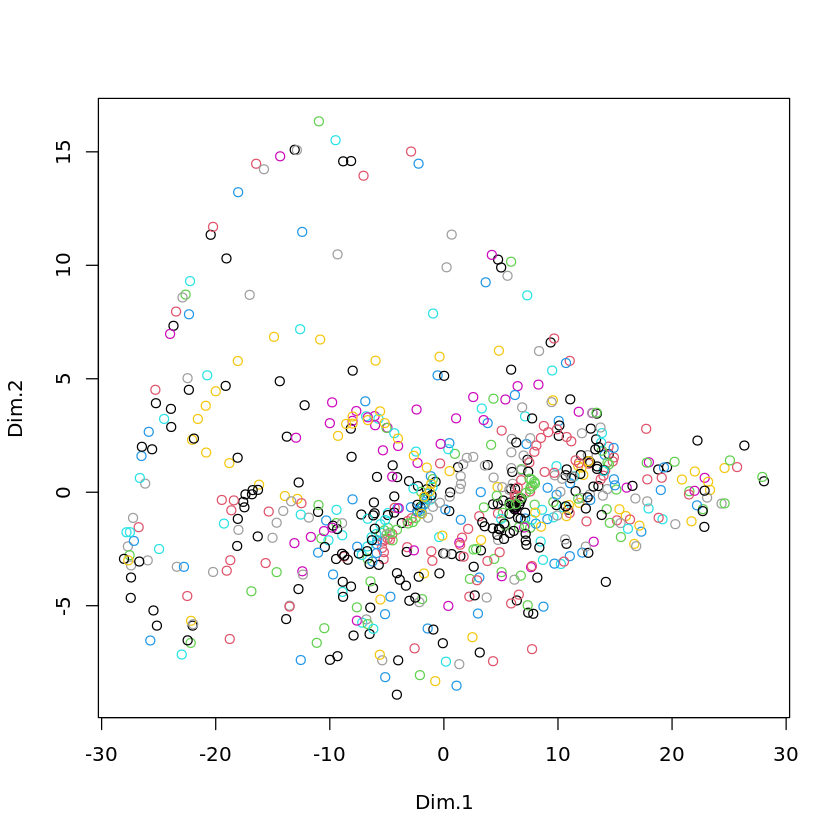

In [206]:
ward.jaffe=NbClust(jaffe$X, method = "ward.D", distance = "euclidean", index = "silhouette",min.nc = 10,max.nc = 10)
plot(pca.jaffe$ind$coord,col=ward.jaffe$Best.partition)

In [207]:
table(ward.jaffe$Best.partition,as.vector(jaffe$y))

    
      1  2  3  4  5  6  7  8  9 10
  1  12  0  0  1 21  6  0  0  0  0
  2  11  0  0  0  0  0  0  0  0  0
  3   0 22  0  0  0  0  0  0  0  0
  4   0  0 22  0  0  0  0  0  0  0
  5   0  0  0 19  0  0  0  0  0  0
  6   0  0  0  0  0 15  0  0  0  0
  7   0  0  0  0  0  0 20  0  0  0
  8   0  0  0  0  0  0  0 21  0  6
  9   0  0  0  0  0  0  0  0 21  0
  10  0  0  0  0  0  0  0  0  0 16

In [208]:
(11+1+6+6)/223

[1] 0.1076233

In [211]:
NMI(ward.jaffe$Best.partition,as.vector(jaffe$y))

[1] 0.8830157

In [212]:
ARI(ward.jaffe$Best.partition,as.vector(jaffe$y))

[1] 0.770108

### Complete

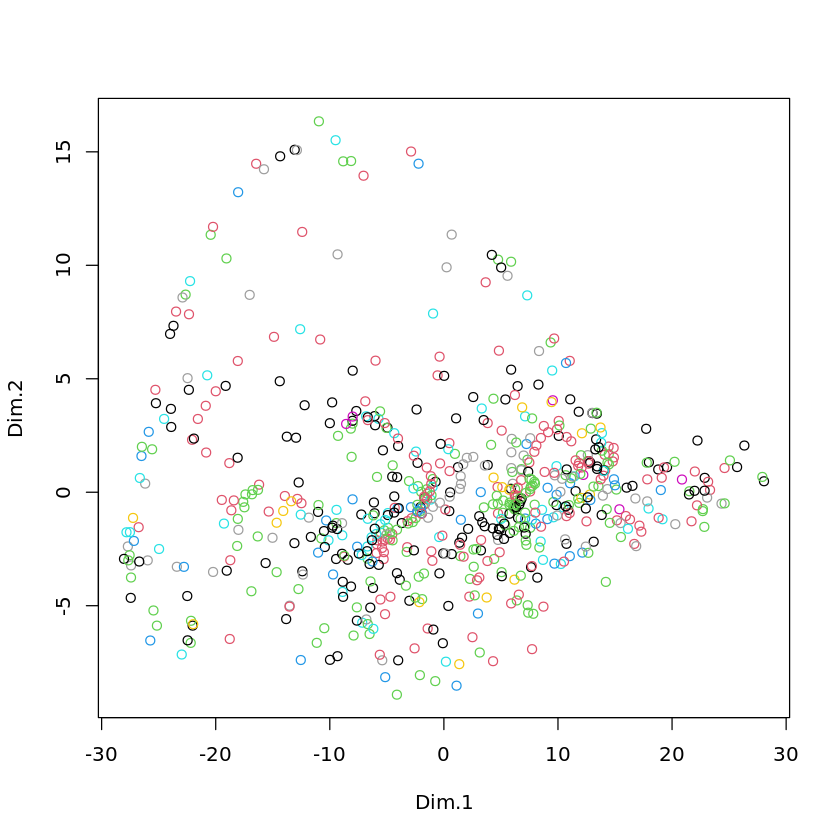

In [213]:
complete.jaffe=NbClust(jaffe$X, method = "complete", distance = "euclidean", index = "silhouette",min.nc = 10,max.nc = 10)
plot(pca.jaffe$ind$coord,col=complete.jaffe$Best.partition)

In [214]:
table(complete.jaffe$Best.partition,as.vector(jaffe$y))

    
      1  2  3  4  5  6  7  8  9 10
  1  12  0  0  1 15 21  0  0  0  0
  2  11  0  9  0  0  0 15  0  0  0
  3   0 22  0  0  6  0  3  0 21  0
  4   0  0 13  0  0  0  0  0  0  0
  5   0  0  0 19  0  0  0  0  0  0
  6   0  0  0  0  0  0  2  0  0  0
  7   0  0  0  0  0  0  0  6  0  0
  8   0  0  0  0  0  0  0 15  0  6
  9   0  0  0  0  0  0  0  0  0  3
  10  0  0  0  0  0  0  0  0  0 13

In [217]:
(11+9+1+6+5+6+9)/223

[1] 0.2107623

In [215]:
NMI(complete.jaffe$Best.partition,as.vector(jaffe$y))

[1] 0.6613371

In [216]:
ARI(complete.jaffe$Best.partition,as.vector(jaffe$y))

[1] 0.4499918

### Single

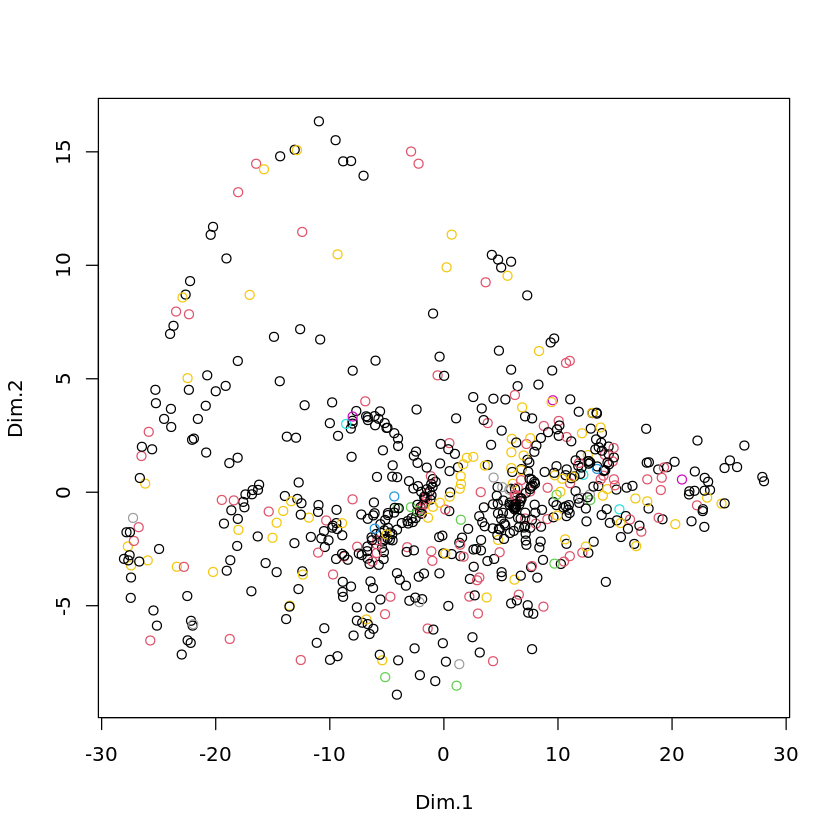

In [218]:
single.jaffe=NbClust(jaffe$X, method = "single", distance = "euclidean", index = "silhouette",min.nc = 10,max.nc = 10)
plot(pca.jaffe$ind$coord,col=single.jaffe$Best.partition)

In [219]:
table(single.jaffe$Best.partition,as.vector(jaffe$y))

    
      1  2  3  4  5  6  7  8  9 10
  1  23 22  0 20 20 21 18  0 21  0
  2   0  0 19  0  0  0  0  0  0  0
  3   0  0  3  0  0  0  0  0  0  0
  4   0  0  0  0  1  0  0  0  0  0
  5   0  0  0  0  0  0  1  0  0  0
  6   0  0  0  0  0  0  1  0  0  0
  7   0  0  0  0  0  0  0 18  0  6
  8   0  0  0  0  0  0  0  3  0  0
  9   0  0  0  0  0  0  0  0  0  3
  10  0  0  0  0  0  0  0  0  0 13

In [224]:
NMI(single.jaffe$Best.partition,as.vector(jaffe$y))

[1] 0.3977141

In [225]:
ARI(single.jaffe$Best.partition,as.vector(jaffe$y))

[1] 0.1468528

### MMG

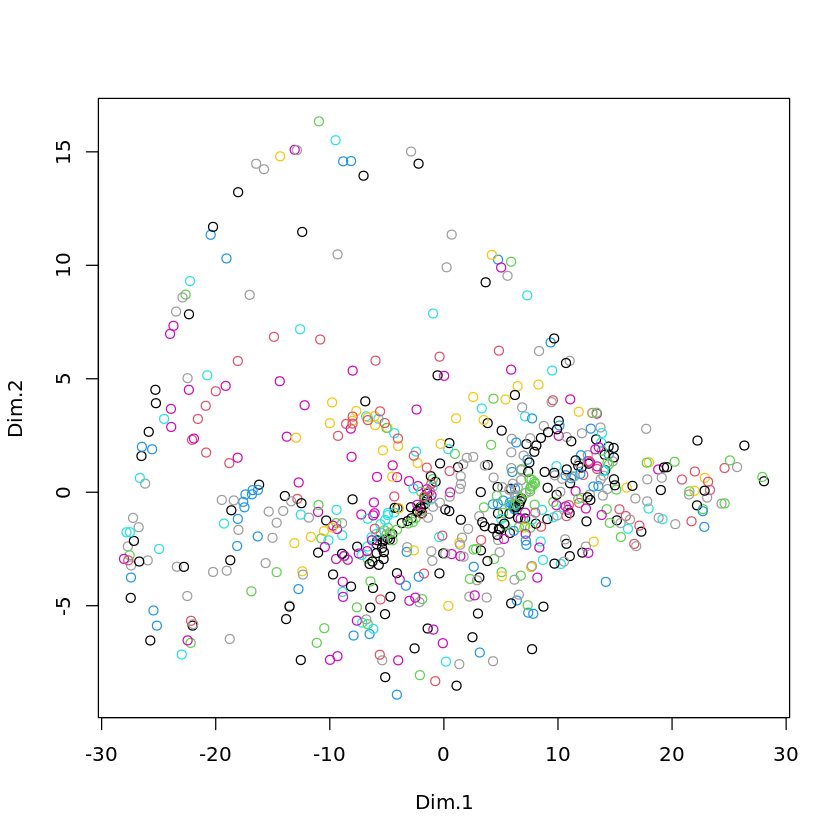

In [226]:
plot(pca.jaffe$ind$coord,col=mmgRmix.jaffe@bestResult@partition)

In [227]:
table(mmgRmix.jaffe@bestResult@partition,as.vector(jaffe$y))

    
      1  2  3  4  5  6  7  8  9 10
  1   0  0 22  0  0  0  0  0  0  0
  2   0  0  0  0  1  0 16  0  0  0
  3   0 22  0  0  0  0  0  0  0  0
  4   0  0  0  0  0  0  0  0 21  0
  5   0  0  0 20  0  0  0  0  0  0
  6   0  0  0  0 20  7  0  0  0  0
  7   0  0  0  0  0 14  0  0  0  0
  8   0  0  0  0  0  0  0 21  0 22
  9  23  0  0  0  0  0  2  0  0  0
  10  0  0  0  0  0  0  2  0  0  0

In [228]:
NMI(mmgRmix.jaffe@bestResult@partition,as.vector(jaffe$y))

[1] 0.885739

In [229]:
ARI(mmgRmix.jaffe@bestResult@partition,as.vector(jaffe$y))

[1] 0.8024496

In [257]:
table( mmgMclust.jaffe$classification,jaffe$y)

   
     1  2  3  4  5  6  7  8  9 10
  1 23  0  0  1 21  1  0  0  0  0
  2  0 22  0  0  0  0  0  0  0  0
  3  0  0 22  0  0  0  0  0  0  0
  4  0  0  0 19  0  0  0  0  0  0
  5  0  0  0  0  0 20  0  0  0  0
  6  0  0  0  0  0  0 20  0  0  0
  7  0  0  0  0  0  0  0 21  0  6
  8  0  0  0  0  0  0  0  0 21  0
  9  0  0  0  0  0  0  0  0  0 16

In [258]:
NMI(mmgMclust.jaffe$classification,as.vector(jaffe$y))

[1] 0.8891035

In [259]:
ARI(mmgMclust.jaffe$classification,as.vector(jaffe$y))

[1] 0.8094428

### Conclusion

On peut voir que MMG>Ward>Kmeans >> Complete > Average >> Single

## t-SNE

### MMG

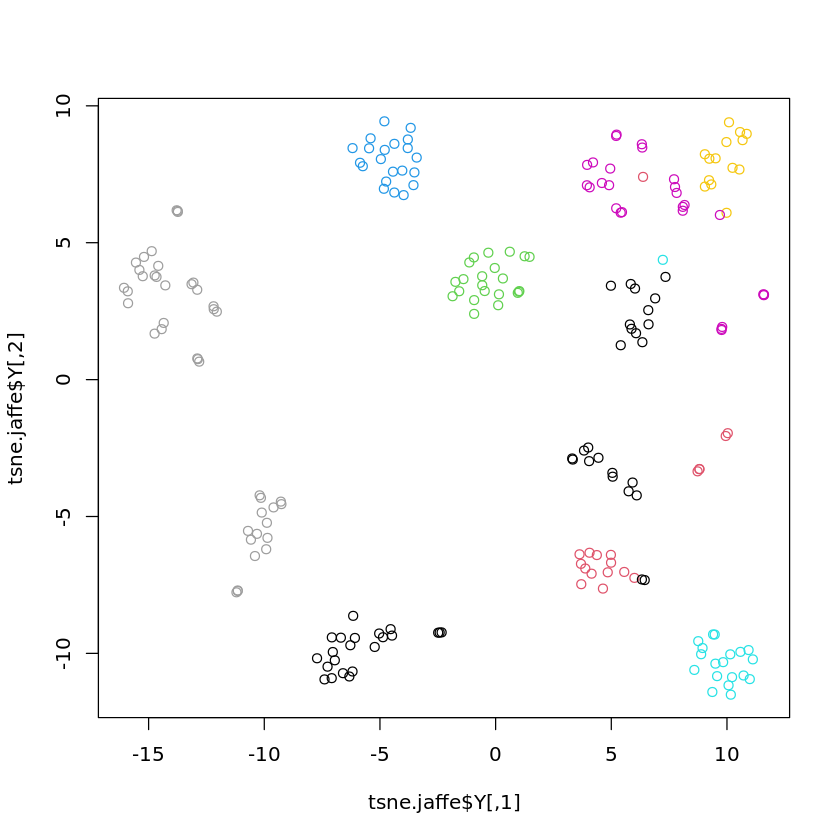

In [232]:
plot(tsne.jaffe$Y,col=mmgRmix.jaffe@bestResult@partition)

### Kmeans

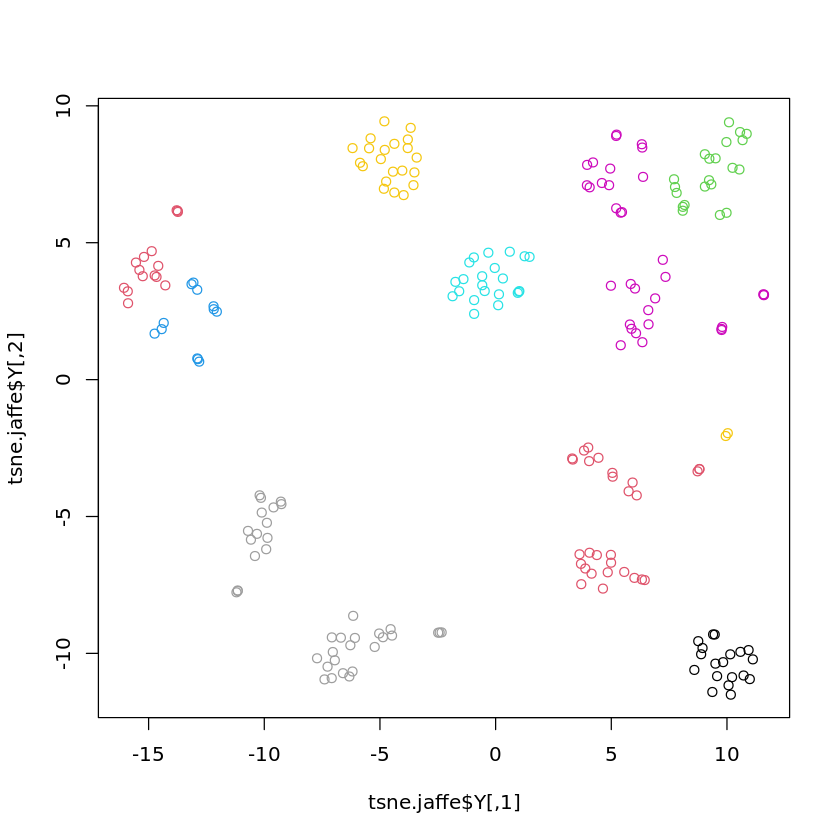

In [234]:
plot(tsne.jaffe$Y,col=km.jaffe$Best.partition)

### Average

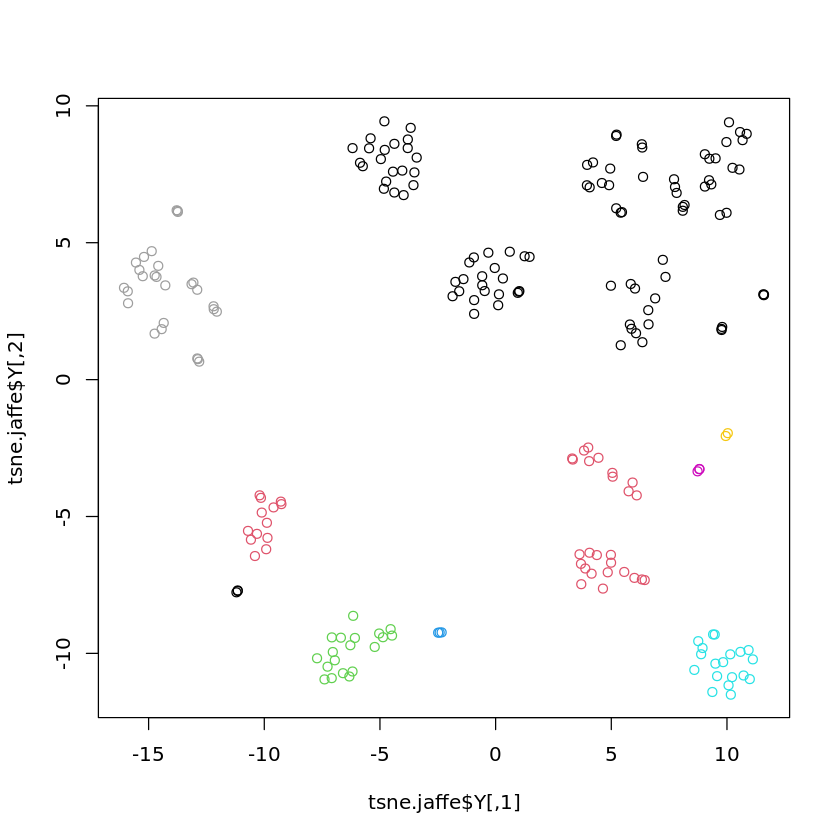

In [235]:
plot(tsne.jaffe$Y,col=average.jaffe$Best.partition)

### Ward

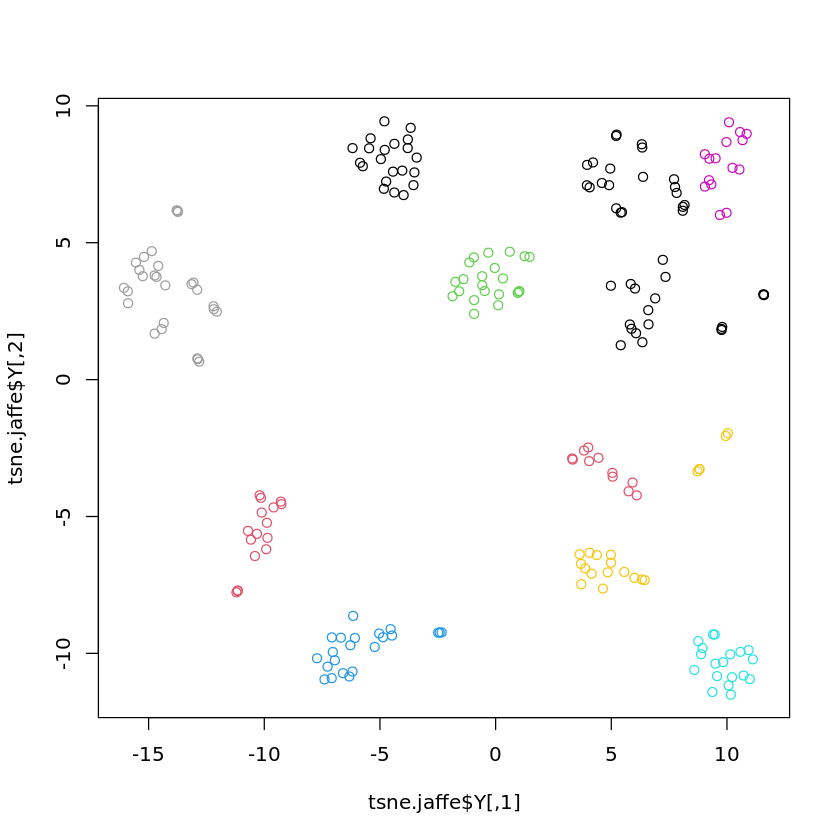

In [236]:
plot(tsne.jaffe$Y,col=ward.jaffe$Best.partition)

### Single

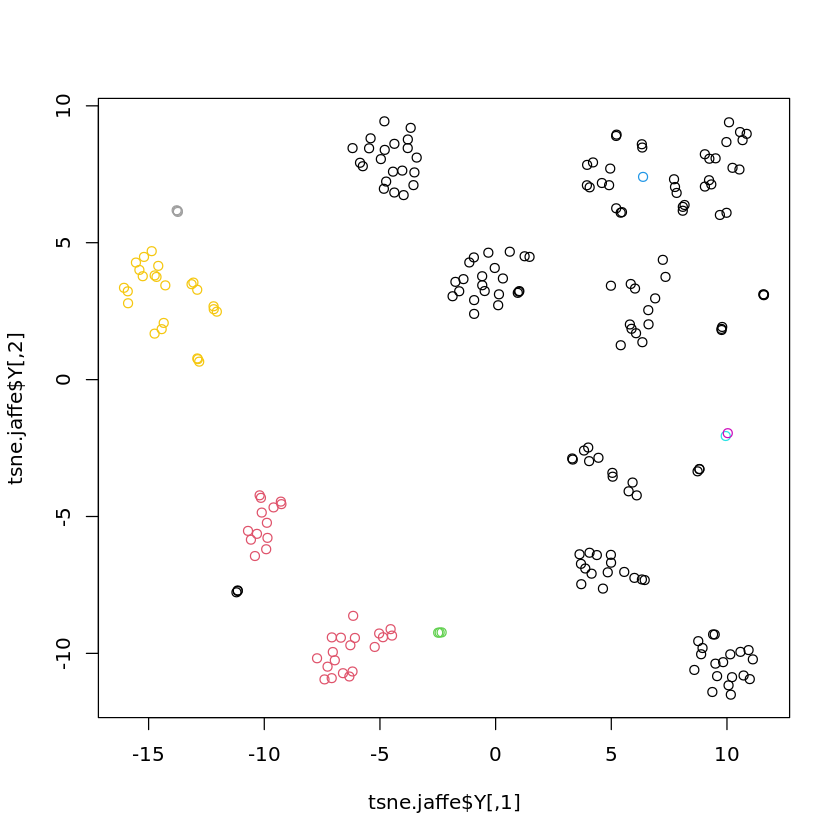

In [238]:
plot(tsne.jaffe$Y,col=single.jaffe$Best.partition)

### Complete

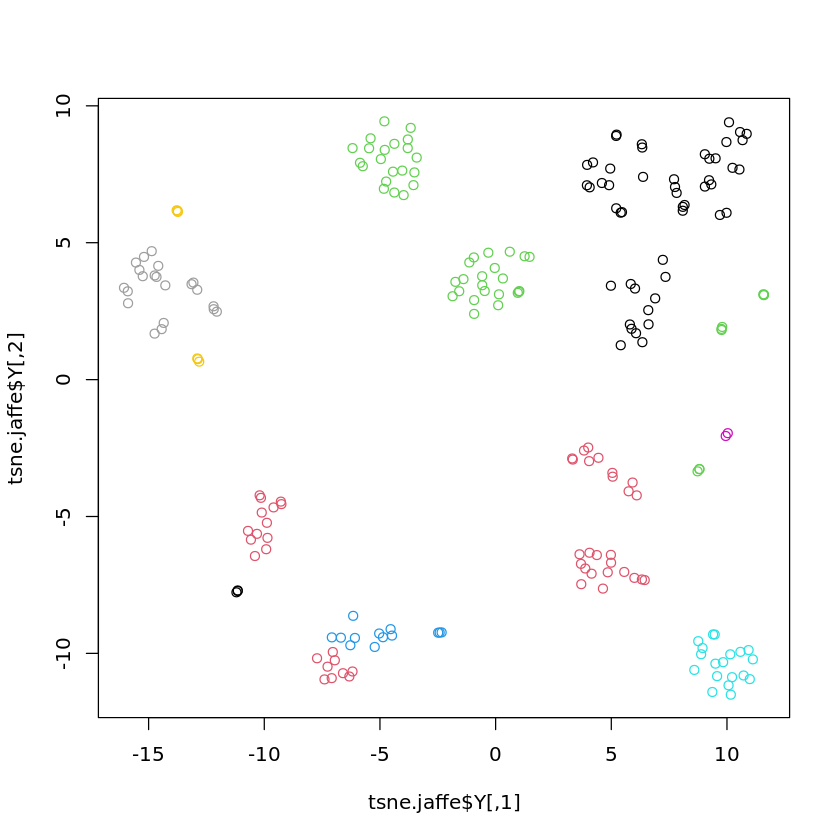

In [239]:
plot(tsne.jaffe$Y,col=complete.jaffe$Best.partition)

## UMAP

In [243]:
umap.jaffe = umap(jaffe$X)

In [244]:
umap.jaffe

umap embedding of 213 items in 2 dimensions
object components: layout, data, knn, config



### MMG

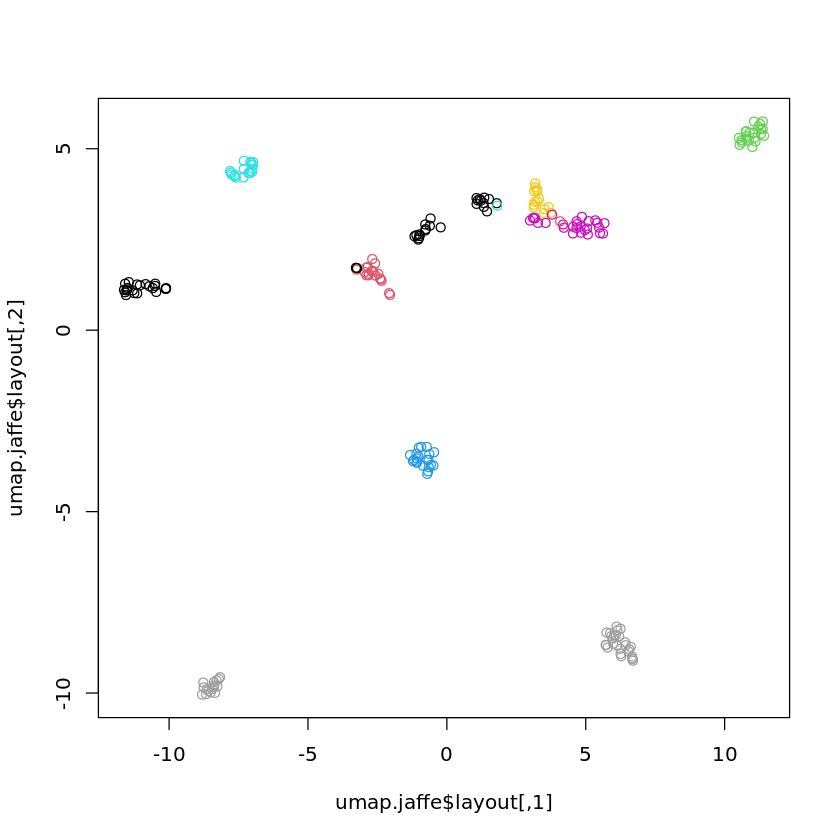

In [245]:
plot(umap.jaffe$layout,col=mmgRmix.jaffe@bestResult@partition)

### Kmeans

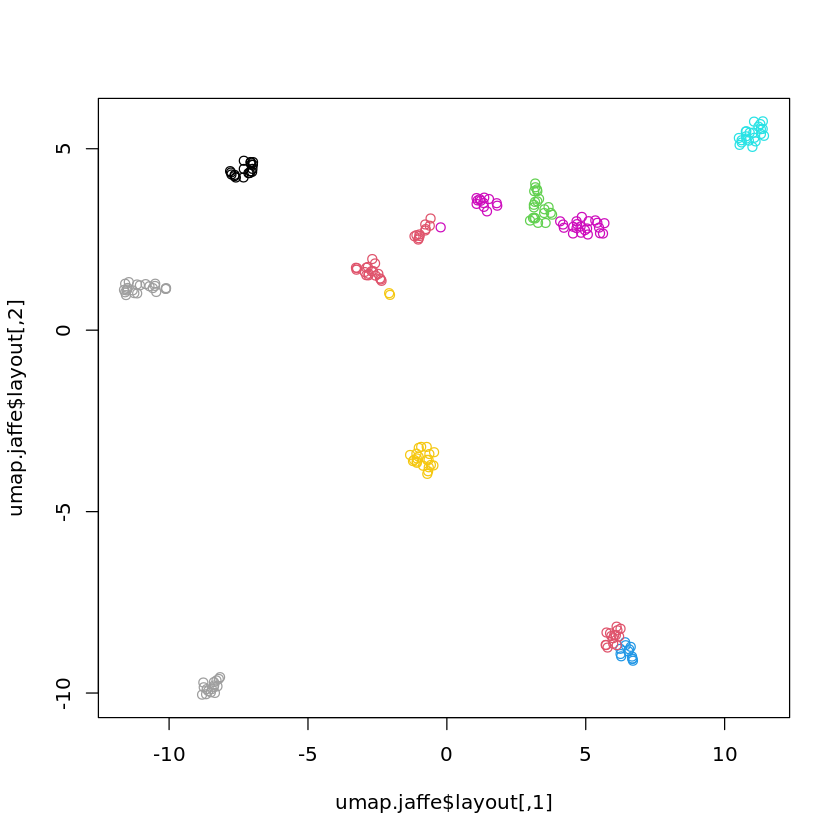

In [246]:
plot(umap.jaffe$layout,col=km.jaffe$Best.partition)

### Average

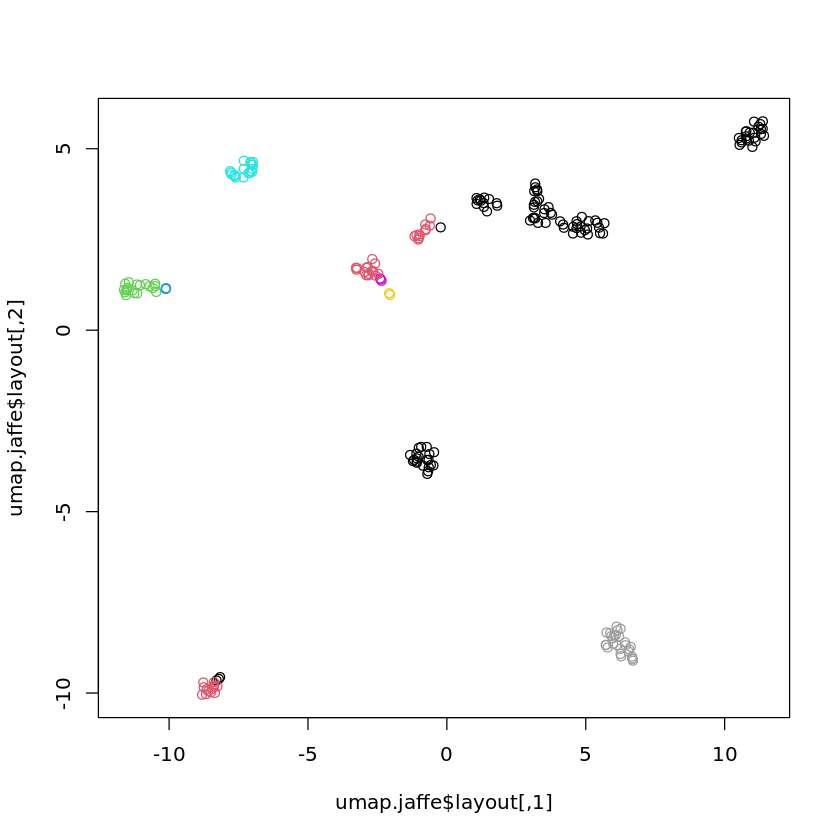

In [247]:
plot(umap.jaffe$layout,col=average.jaffe$Best.partition)

### Ward

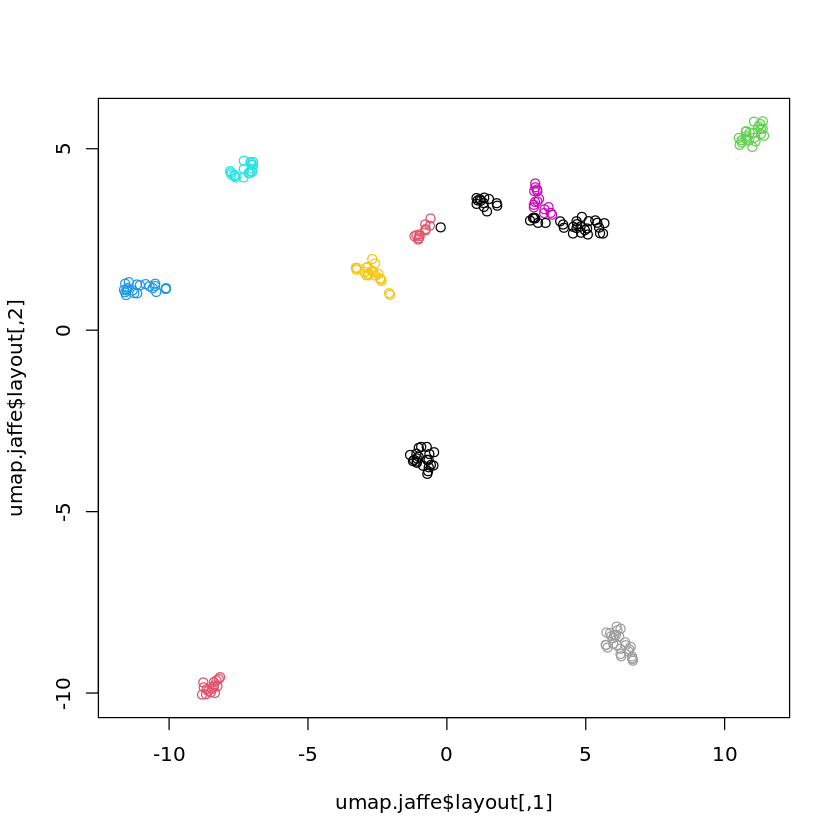

In [248]:
plot(umap.jaffe$layout,col=ward.jaffe$Best.partition)

### Single

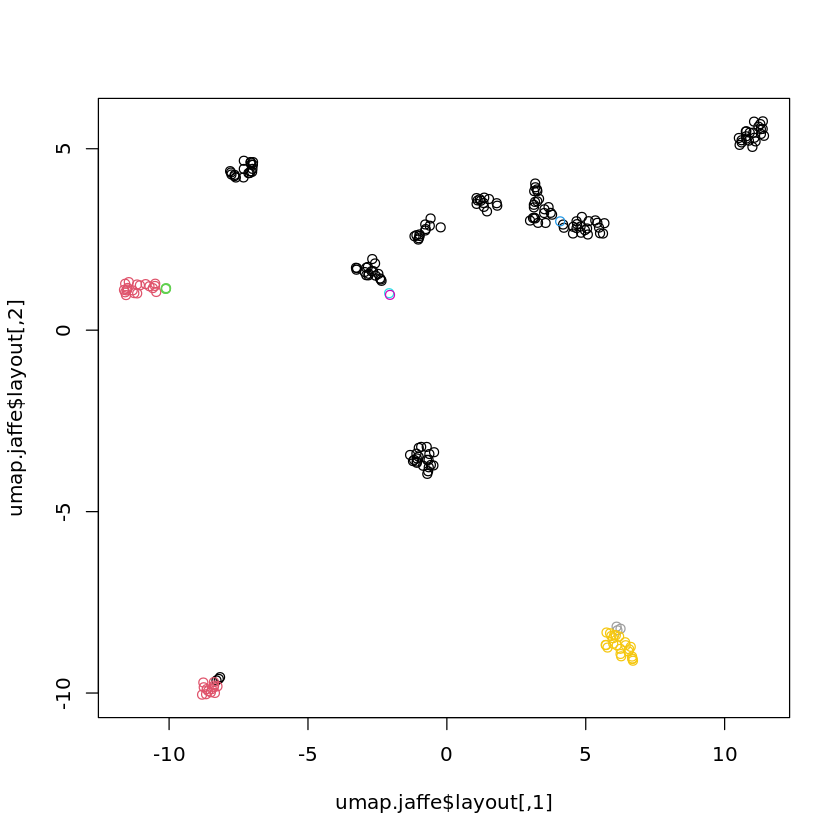

In [249]:
plot(umap.jaffe$layout,col=single.jaffe$Best.partition)

### Complete

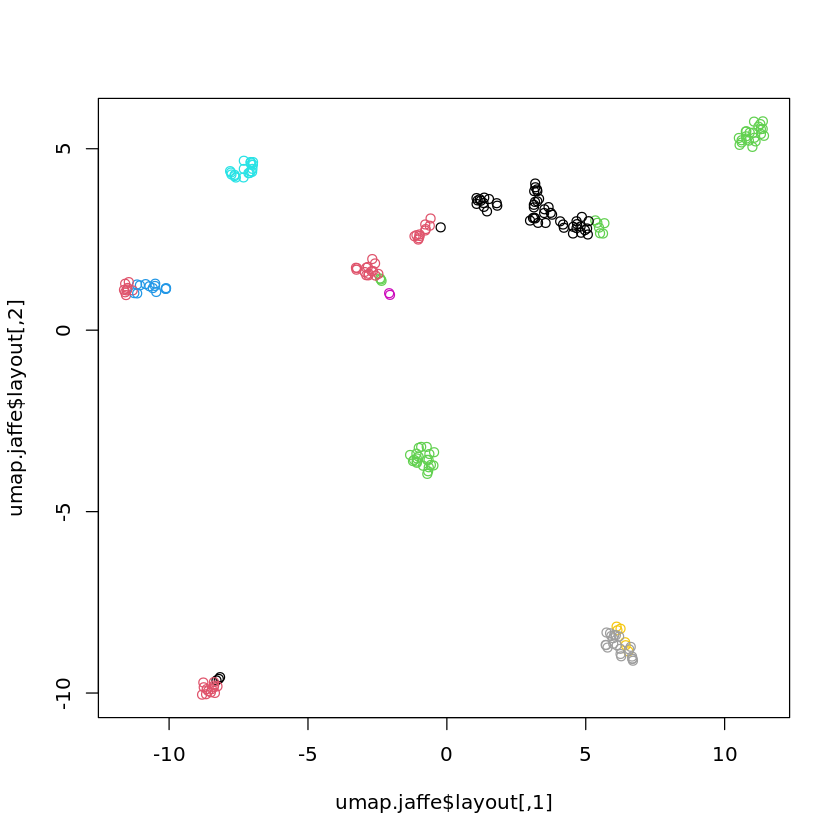

In [250]:
plot(umap.jaffe$layout,col=complete.jaffe$Best.partition)

## Autoencoder

In [275]:
jaffe_reduced <- read.csv(file = 'data/jaffe_reduced.csv', header=F)

In [276]:
mmgMclust.jaffe_reduced=Mclust(data= jaffe_reduced)

In [277]:
mmgMclust.jaffe_reduced

'Mclust' model object: (EEE,3) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "loglik"        
 [9] "df"             "bic"            "icl"            "hypvol"        
[13] "parameters"     "z"              "classification" "uncertainty"   

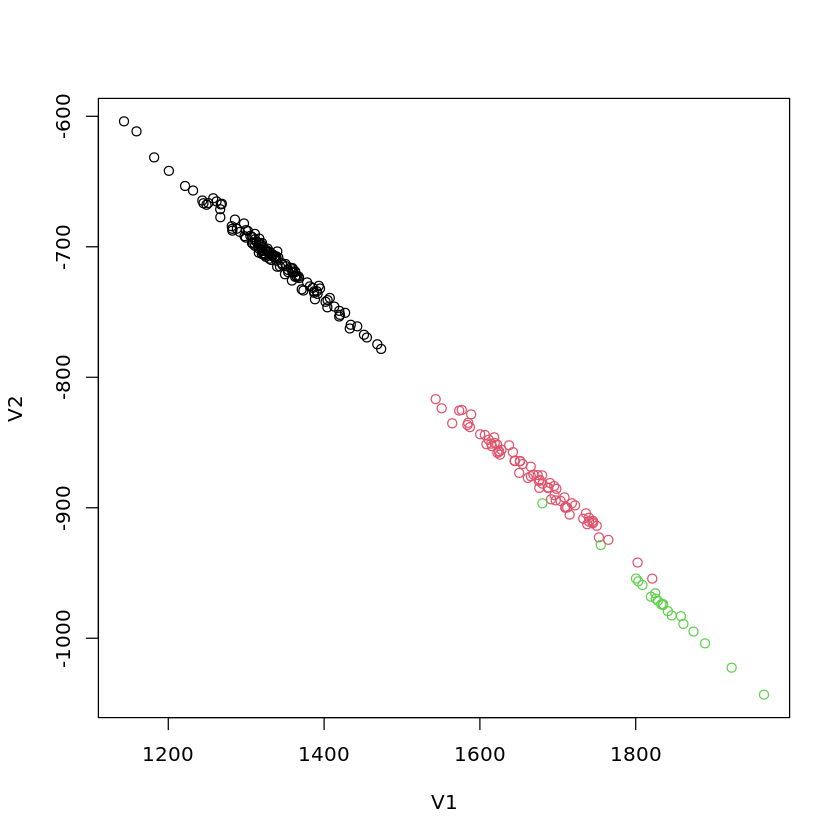

In [266]:
plot(jaffe_reduced,col=mmgMclust.jaffe_reduced$classification)

In [267]:
table(mmgMclust.jaffe_reduced$classification,jaffe$y)

   
     1  2  3  4  5  6  7  8  9 10
  1 12 22  0  1 21 19  0 21 21  6
  2 11  0 22  0  0  2 19  0  0 16
  3  0  0  0 19  0  0  1  0  0  0

In [270]:
NMI(mmgMclust.jaffe_reduced$classification,as.vector(jaffe$y))

[1] 0.3047167

In [271]:
ARI(mmgMclust.jaffe_reduced$classification,as.vector(jaffe$y))

[1] 0.1726818

Ya peu de donnees l'autenencoder pour bien apprender une bonne representation

## MNIST

In [11]:
pca.mnist=PCA(mnist$X,ncp=2)

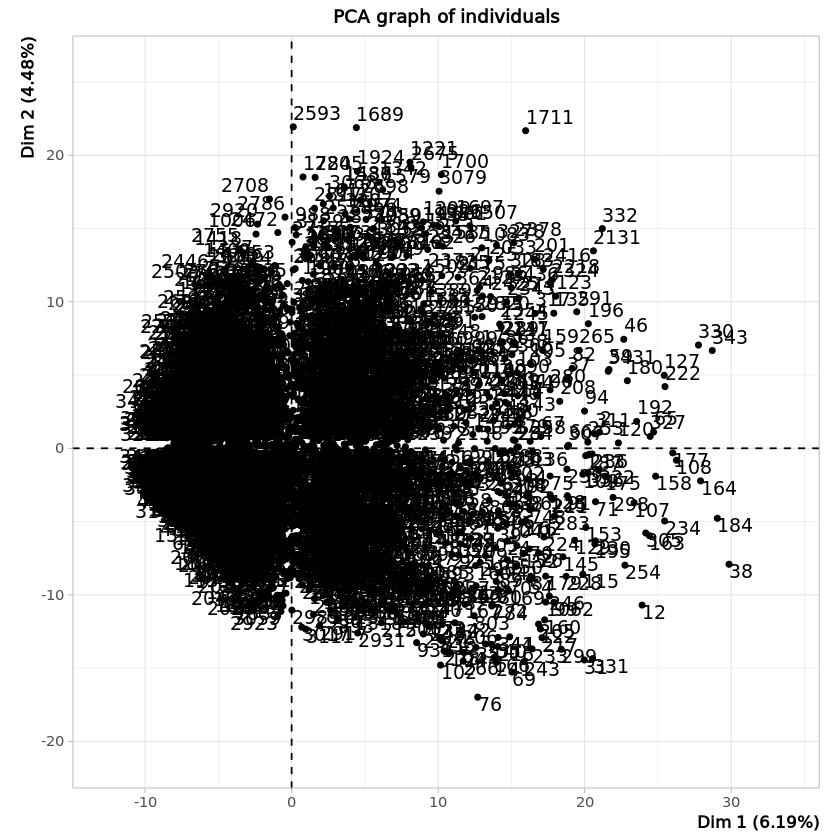

In [12]:
plot(pca.mnist)

## MFEA

In [13]:
pca.mfeat=PCA(mfeat$X,ncp=2)

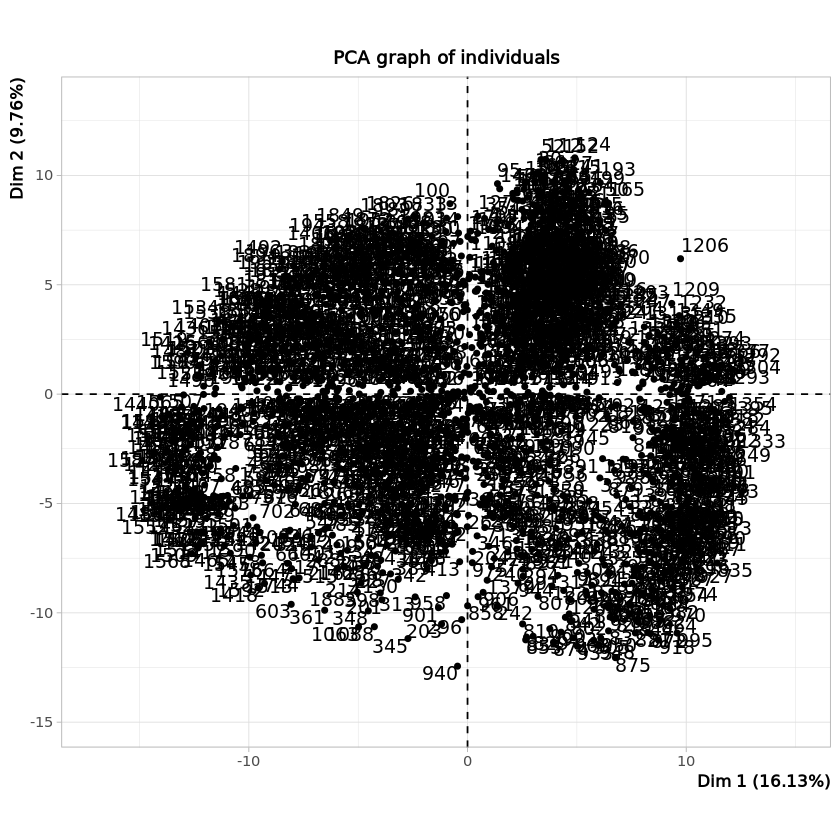

In [14]:
plot(pca.mfeat)

## USPS

In [15]:
pca.usps=PCA(usps$X,ncp=2)

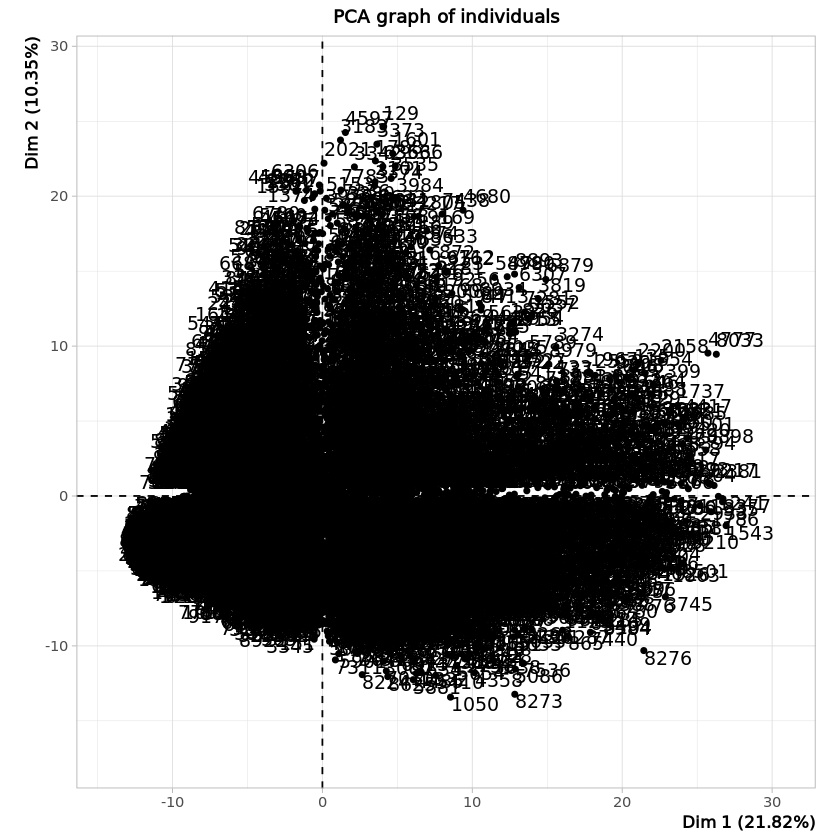

In [16]:
plot(pca.usps)

## OPTIDIGITS

In [17]:
pca.optidigits=PCA(optidigits$X,ncp=2)

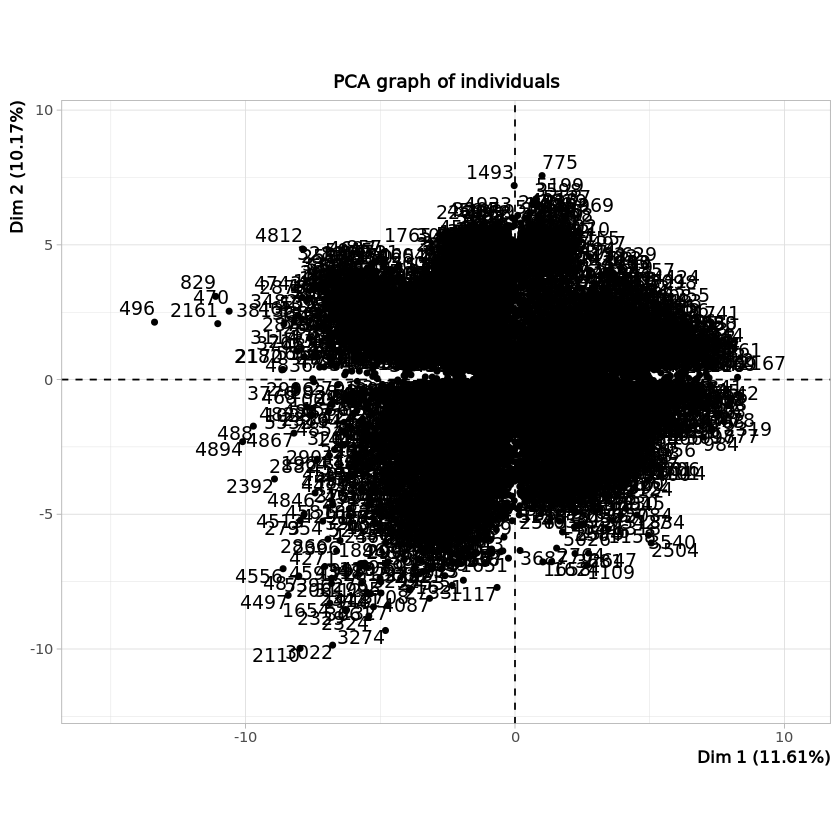

In [18]:
plot(pca.optidigits)

In [21]:
km.mnist=NbClust(mnist$X, method = "kmeans", distance = "euclidean", index = "silhouette",max.nc = 10)

In [22]:
km.mnist$Best.nc

Number_clusters     Value_Index 
         2.0000          0.0842

In [23]:
km.mfeat=NbClust(mfeat$X, method = "kmeans", distance = "euclidean", index = "silhouette",max.nc = 10)

In [24]:
km.mfeat$Best.nc

Number_clusters     Value_Index 
        10.0000          0.1359

In [25]:
km.usps=NbClust(usps$X, method = "kmeans", distance = "euclidean", index = "silhouette",max.nc = 10)

In [26]:
km.usps$Best.nc

Number_clusters     Value_Index 
         2.0000          0.1832

In [27]:
km.optidigits=NbClust(optidigits$X, method = "kmeans", distance = "euclidean", index = "silhouette",max.nc = 10)

In [28]:
km.optidigits$Best.nc

Number_clusters     Value_Index 
        10.0000          0.1881